In [305]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the gold data
df = pd.read_csv('../../data/XAUUSD_2010-2023.csv').head(100_000)
df

,time,open,high,low,close,rsi14,sma14
0,2010-01-03 18:00:00,1098.45,1100.00,1098.05,1099.95,81.98,1096.38
1,2010-01-03 18:05:00,1100.00,1100.30,1099.45,1099.75,79.17,1096.72
2,2010-01-03 18:10:00,1099.70,1100.10,1099.30,1099.45,75.02,1097.03
3,2010-01-03 18:15:00,1099.50,1099.60,1098.50,1099.45,75.02,1097.30
4,2010-01-03 18:20:00,1099.40,1099.60,1098.90,1098.90,67.50,1097.50
...,...,...,...,...,...,...,...
99995,2011-05-23 20:00:00,1514.23,1514.83,1513.88,1514.73,44.35,1514.50
99996,2011-05-23 20:05:00,1514.78,1515.53,1514.58,1515.23,51.24,1514.50
99997,2011-05-23 20:10:00,1515.18,1515.88,1515.13,1515.43,53.71,1514.51
99998,2011-05-23 20:15:00,1515.38,1516.78,1515.38,1516.63,65.12,1514.62


In [302]:

# Preprocess the data
# Select relevant columns
df = df[['open', 'high', 'low', 'close']]

In [303]:
# Handle missing values
df.dropna()


,open,high,low,close
0,1098.45,1100.00,1098.05,1099.95
1,1100.00,1100.30,1099.45,1099.75
2,1099.70,1100.10,1099.30,1099.45
3,1099.50,1099.60,1098.50,1099.45
4,1099.40,1099.60,1098.90,1098.90
...,...,...,...,...
99995,1514.23,1514.83,1513.88,1514.73
99996,1514.78,1515.53,1514.58,1515.23
99997,1515.18,1515.88,1515.13,1515.43
99998,1515.38,1516.78,1515.38,1516.63


In [304]:

# Normalize the data

scaler = StandardScaler()
df[['open', 'high', 'low', 'close']] = scaler.fit_transform(df[['open', 'high', 'low', 'close']])

C:\Users\liar88828\AppData\Local\Temp\ipykernel_14892\1871080573.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['open', 'high', 'low', 'close']] = scaler.fit_transform(df[['open', 'high', 'low', 'close']])


In [46]:

# Choose the number of clusters (K)
K = 3

# Create the K-Means clustering model
kmeans = KMeans(n_clusters=K)

# Fit the model to the data
kmeans.fit(df[['open', 'high', 'low', 'close']])

KMeans(n_clusters=3)

In [49]:

# Predict the clusters
labels = kmeans.labels_
labels

array([2, 2, 2, ..., 1, 1, 1])

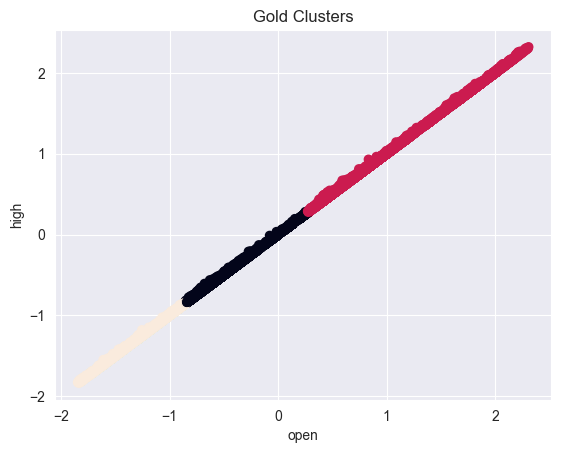

In [50]:

# Visualize the clusters
plt.scatter(
    df['open'],
    df['high'],
    c=labels)
plt.xlabel('open')
plt.ylabel('high')
plt.title('Gold Clusters')
plt.show()



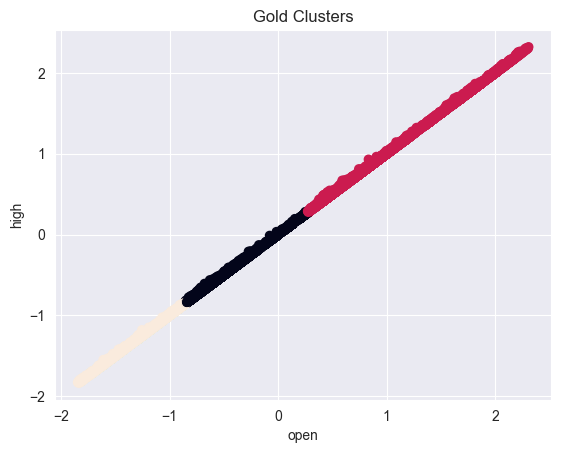

KeyboardInterrupt: 

In [48]:
# Evaluate the clustering model
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(df[['open', 'high', 'low', 'close']], labels)
print(f'Silhouette Coefficient: {silhouette:.3f}')
